In [101]:
import sqlite3
import pandas as pd
from pandasql import sqldf
import pandasql as pandasql
import numpy as np
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier  
import sklearn
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score  


print(sklearn.__version__)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from numpy import std


from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix 


#assert float(sklearn.__version__[2:]) >= 21, 'sklearn version insufficient.'

0.22.2.post1


In [2]:
pwd

'C:\\Users\\Olakeyede Olayinka'

In [3]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("C:\\Users\\Olakeyede Olayinka\\downloads\\database.sqlite")


In [4]:
cur = con.cursor()


In [5]:
cur2 = con.cursor()


In [6]:
data = cur.execute('SELECT * FROM county_facts;')

In [14]:
data2 = cur.execute('SELECT * FROM primary_results;')
df2 = pd.read_sql_query("SELECT * FROM primary_results where state_abbreviation = 'UT'", con)
df2.head()


,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Utah,UT,Beaver,49001,Democrat,Bernie Sanders,0,0.000
1,Utah,UT,Beaver,49001,Democrat,Hillary Clinton,0,0.000
2,Utah,UT,Box Elder,49003,Democrat,Bernie Sanders,281,0.755
3,Utah,UT,Box Elder,49003,Democrat,Hillary Clinton,90,0.242
4,Utah,UT,Cache,49005,Democrat,Bernie Sanders,2906,0.815


In [16]:
df = pd.read_sql_query("SELECT * from county_facts where state_abbreviation = 'UT';", con)
df.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,49001,Beaver County,UT,6461,6629,-2.5,6629,8.2,32.3,13.7,...,0.0,0.0,0,0,89663,14776,12753,16,2589.88,2.6
1,49003,Box Elder County,UT,51518,49975,3.1,49975,8.6,32.8,12.2,...,1.4,20.7,3150909,0,447418,9348,36827,164,5745.55,8.7
2,49005,Cache County,UT,118343,112656,5.0,112656,9.3,31.1,8.6,...,2.6,22.2,0,361610,1095090,10079,95153,749,1164.81,96.7
3,49007,Carbon County,UT,20660,21403,-3.5,21403,7.7,26.9,15.3,...,0.0,0.0,0,0,298872,15197,26154,66,1478.49,14.5
4,49009,Daggett County,UT,1117,1061,5.3,1059,5.2,23.0,21.2,...,0.0,0.0,0,0,0,0,6358,7,696.98,1.5


In [10]:
df.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [18]:
##Q1 population estimate of Utah in 2014
df['PST045214'].sum()

2942902

In [19]:
##Q2  What percent of people 25+ have a bachelor's degree (or higher)?

df10 = pd.read_sql_query('''
    SELECT
    area_name, 
    EDU685213 
    from county_facts
    where state_abbreviation ='' and area_name= 'Utah'
    ''', con)
df10

,area_name,EDU685213
0,Utah,30.3


In [20]:
##Q3 What percent of people 25+ are high school graduates (or higher)?

df11 = pd.read_sql_query('''
    SELECT
    area_name, 
    EDU635213
    from county_facts
    where state_abbreviation ='' and area_name= 'Utah'
    ''', con)
df11

,area_name,EDU635213
0,Utah,90.9


In [21]:
##Q4 What are the total retail sales of the state in 2007?
df['RTN130207'].sum()*1000


36568346000

In [22]:
##Q5 How many counties are there in Utah?
df['area_name'].nunique()

29

In [23]:
## Q6 How many counties in Utah had a greater proportion vote for Bernie Sanders versus the other Democratic candidate?
df_democrat= df2[df2['party']  == 'Democrat']
df_democrat.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Utah,UT,Beaver,49001,Democrat,Bernie Sanders,0,0.000
1,Utah,UT,Beaver,49001,Democrat,Hillary Clinton,0,0.000
2,Utah,UT,Box Elder,49003,Democrat,Bernie Sanders,281,0.755
3,Utah,UT,Box Elder,49003,Democrat,Hillary Clinton,90,0.242
4,Utah,UT,Cache,49005,Democrat,Bernie Sanders,2906,0.815


In [24]:
df_democrat = pd.pivot_table(df_democrat, index  = 'county' ,columns = 'candidate', values = 'fraction_votes' )
df_democrat=df_democrat.reset_index()


In [182]:
def votes(x):
    if x[1] > x[2]:
        return x[1]
    
df_democrat['x'] = df_democrat.apply(votes, axis = 1)
df_democrat['x'].count()
#### 26 counties had a greater proportion of people that voted for Bernie Sanders

26

In [33]:
## Q7 Which candidate got the highest number of votes in the Utah Republican primary? And in the Democratic primary?
df_republican= df2[df2['party']  == 'Republican']

##Ted Cruz

In [31]:
df_republican = pd.pivot_table(df_republican, index  = 'county' ,columns = 'candidate', values = 'votes' )
df_republican = df_republican.reset_index()
df_republican.head()

candidate,county,Donald Trump,John Kasich,Ted Cruz
0,Beaver,87,47,229
1,Box Elder,520,638,3314
2,Cache,1049,1892,7172
3,Carbon,293,90,595
4,Daggett,33,25,36


In [32]:
df_republican2 = df_republican[['Donald Trump', 'John Kasich', 'Ted Cruz']].sum()
df_republican2.sort_values(ascending=False).head(1)


candidate
Ted Cruz    122567
dtype: int64

In [34]:
##Q8 Find a list of counties in Utah, using as few counties as possible, 
#such that if their votes were not included in the totals, it would change who got 
#the highest number of total votes in the Utah Democratic primary?


##Answer: all of them except those with 0 total votes 

In [ ]:
#Q9 Can we infer from the data which candidate high school graduates without a bachelor's degree or above (ages 25+) prefer in Utah? 
#If no please explain why, otherwise provide the candidate name.

##NO, we cant say for sure which candidate each person voted for. on other hand, the county with the lowest % of high school graduates without a bachelor's 
#degree or above (ages 25+), Bernie sanders won, in the county with the highest % of high school graduates without a bachelor's 
#degree or above (ages 25+), Ted cruz won, butthen again, we really cant infer which candidates they prefer, correlation does not exual causation



In [52]:
df['no_bachelors'] = df['EDU635213'] - df['EDU685213'] #% of hight school candidates without a bachelors degree
df_no_bachelors = df[['area_name','no_bachelors', 'EDU635213', 'EDU685213'] ]

df_winners_utah = pd.read_sql_query(
                        '''
                        select * from (select 
                        *,
                       rank() over (partition by state_abbreviation, area_name order by total_votes desc) as winner
                        from
                        (SELECT state_abbreviation, county as 'area_name',
                        candidate,party,  sum(votes) 
                        as 'total_votes' 
                        FROM primary_results 
                        group by 1,2,3,4)a)b
                        where state_abbreviation = 'UT'
                        and winner = 1
                        ''' , con)

df_winners_utah.head()

,state_abbreviation,area_name,candidate,party,total_votes,winner
0,UT,Beaver,Ted Cruz,Republican,229,1
1,UT,Box Elder,Ted Cruz,Republican,3314,1
2,UT,Cache,Ted Cruz,Republican,7172,1
3,UT,Carbon,Ted Cruz,Republican,595,1
4,UT,Daggett,Ted Cruz,Republican,36,1


In [51]:
df_winners_utah = pd.concat([df_no_bachelors, df_winners_utah], axis = 1)
df_winners_utah

##summit county has the lowest % of graduates without a bachelor's degree or above (ages 25+)  and Bernie Sanders won in that county

,area_name,no_bachelors,EDU635213,EDU685213,area_name,no_bachelors,EDU635213,EDU685213,area_name,no_bachelors,EDU635213,EDU685213,state_abbreviation,area_name,candidate,party,total_votes,winner
0,Beaver County,73.9,90.9,17.0,Beaver County,73.9,90.9,17.0,Beaver County,73.9,90.9,17.0,UT,Beaver,Ted Cruz,Republican,229,1
1,Box Elder County,70.5,91.7,21.2,Box Elder County,70.5,91.7,21.2,Box Elder County,70.5,91.7,21.2,UT,Box Elder,Ted Cruz,Republican,3314,1
2,Cache County,55.6,92.5,36.9,Cache County,55.6,92.5,36.9,Cache County,55.6,92.5,36.9,UT,Cache,Ted Cruz,Republican,7172,1
3,Carbon County,73.4,86.0,12.6,Carbon County,73.4,86.0,12.6,Carbon County,73.4,86.0,12.6,UT,Carbon,Ted Cruz,Republican,595,1
4,Daggett County,67.2,86.0,18.8,Daggett County,67.2,86.0,18.8,Daggett County,67.2,86.0,18.8,UT,Daggett,Ted Cruz,Republican,36,1
5,Davis County,61.3,95.4,34.1,Davis County,61.3,95.4,34.1,Davis County,61.3,95.4,34.1,UT,Davis,Ted Cruz,Republican,17528,1
6,Duchesne County,70.4,86.4,16.0,Duchesne County,70.4,86.4,16.0,Duchesne County,70.4,86.4,16.0,UT,Duchesne,Ted Cruz,Republican,1342,1
7,Emery County,77.3,89.8,12.5,Emery County,77.3,89.8,12.5,Emery County,77.3,89.8,12.5,UT,Emery,Ted Cruz,Republican,455,1
8,Garfield County,71.9,92.0,20.1,Garfield County,71.9,92.0,20.1,Garfield County,71.9,92.0,20.1,UT,Garfield,Ted Cruz,Republican,247,1
9,Grand County,65.8,91.0,25.2,Grand County,65.8,91.0,25.2,Grand County,65.8,91.0,25.2,UT,Grand,Bernie Sanders,Democrat,636,1


In [ ]:
##Q10 Can you answer the question: is there a visible relationship between 
##(a) the 2007 retail sales by county in Utah, and 
##(b) who got the most votes in the 2016 Democratic primary in the state? 
##If there is no relationship please show that.


##there's no visible relationship between the 2007 retail sales and who got the most votes in the democratic primary
##Bernie Sanders won in all the counties. One thing to note is that the higher the retail pricem, the higher the
#number of votes for bernie sanders, 


In [66]:
df14= pd.read_sql_query(
                        '''
                       SELECT candidate, county, party, sum(votes)
                         
                        FROM primary_results 
                        where state_abbreviation = 'UT' and party = 'Democrat'
                       group by 1,2,3
                       
                        ''' , con)
df14.head()

,candidate,county,party,sum(votes)
0,Bernie Sanders,Beaver,Democrat,0
1,Bernie Sanders,Box Elder,Democrat,281
2,Bernie Sanders,Cache,Democrat,2906
3,Bernie Sanders,Carbon,Democrat,235
4,Bernie Sanders,Daggett,Democrat,13


In [55]:
df15 = pd.read_sql_query(
                        '''
                        select * from (select 
                        *,
                        rank() over (partition by state_abbreviation, county, party order by total_votes desc) as winner
                        from
                        (SELECT state_abbreviation, county,
                        candidate,party,  sum(votes) 
                        as 'total_votes' 
                        FROM primary_results
                        where state_abbreviation = 'UT'
                        and party ='Democrat'
                        group by 1,2,3,4
                        )a)b
                        where winner = 1 
                        ''' , con)
df15.head()

,state_abbreviation,county,candidate,party,total_votes,winner
0,UT,Beaver,Bernie Sanders,Democrat,0,1
1,UT,Beaver,Hillary Clinton,Democrat,0,1
2,UT,Box Elder,Bernie Sanders,Democrat,281,1
3,UT,Cache,Bernie Sanders,Democrat,2906,1
4,UT,Carbon,Bernie Sanders,Democrat,235,1


In [56]:
#merge df15 to d3 but filtered out for utah
df14 = pd.read_sql_query("SELECT * from county_facts where state_abbreviation = 'UT';", con)
df14.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,49001,Beaver County,UT,6461,6629,-2.5,6629,8.2,32.3,13.7,...,0.0,0.0,0,0,89663,14776,12753,16,2589.88,2.6
1,49003,Box Elder County,UT,51518,49975,3.1,49975,8.6,32.8,12.2,...,1.4,20.7,3150909,0,447418,9348,36827,164,5745.55,8.7
2,49005,Cache County,UT,118343,112656,5.0,112656,9.3,31.1,8.6,...,2.6,22.2,0,361610,1095090,10079,95153,749,1164.81,96.7
3,49007,Carbon County,UT,20660,21403,-3.5,21403,7.7,26.9,15.3,...,0.0,0.0,0,0,298872,15197,26154,66,1478.49,14.5
4,49009,Daggett County,UT,1117,1061,5.3,1059,5.2,23.0,21.2,...,0.0,0.0,0,0,0,0,6358,7,696.98,1.5


In [58]:
df14 = df14.rename(columns={'area_name': 'county'})
df14['county'] = df14['county'].str.split(' ').str[0]
df14.head()

,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,49001,Beaver,UT,6461,6629,-2.5,6629,8.2,32.3,13.7,...,0.0,0.0,0,0,89663,14776,12753,16,2589.88,2.6
1,49003,Box,UT,51518,49975,3.1,49975,8.6,32.8,12.2,...,1.4,20.7,3150909,0,447418,9348,36827,164,5745.55,8.7
2,49005,Cache,UT,118343,112656,5.0,112656,9.3,31.1,8.6,...,2.6,22.2,0,361610,1095090,10079,95153,749,1164.81,96.7
3,49007,Carbon,UT,20660,21403,-3.5,21403,7.7,26.9,15.3,...,0.0,0.0,0,0,298872,15197,26154,66,1478.49,14.5
4,49009,Daggett,UT,1117,1061,5.3,1059,5.2,23.0,21.2,...,0.0,0.0,0,0,0,0,6358,7,696.98,1.5


In [59]:
df15['county'] = df14['county'].str.split(' ').str[0]
df15.head()

,state_abbreviation,county,candidate,party,total_votes,winner
0,UT,Beaver,Bernie Sanders,Democrat,0,1
1,UT,Box,Hillary Clinton,Democrat,0,1
2,UT,Cache,Bernie Sanders,Democrat,281,1
3,UT,Carbon,Bernie Sanders,Democrat,2906,1
4,UT,Daggett,Bernie Sanders,Democrat,235,1


In [60]:
df16 = pd.merge(df14, df15, how ='inner', on = ['county'])
df16[['candidate', 'RTN130207', 'county', 'total_votes']].head()

,candidate,RTN130207,county,total_votes
0,Bernie Sanders,89663,Beaver,0
1,Hillary Clinton,447418,Box,0
2,Bernie Sanders,1095090,Cache,281
3,Bernie Sanders,298872,Carbon,2906
4,Bernie Sanders,0,Daggett,235


In [65]:
df17 = pandasql.sqldf('''
                       select candidate, RTN130207, county,total_votes from df16 where candidate = 'Bernie Sanders'   ;
     ''', globals())
df17.head()
##plot histogram

,candidate,RTN130207,county,total_votes
0,Bernie Sanders,89663,Beaver,0
1,Bernie Sanders,1095090,Cache,281
2,Bernie Sanders,298872,Carbon,2906
3,Bernie Sanders,0,Daggett,235
4,Bernie Sanders,3217656,Davis,13


In [ ]:
##Part 2
#Note: The questions in this section refer to all US counties, and are not specific to any state in particular.

#Build a model which predicts, for each county, the candidate that will be elected to run for office 
#for both parties (Republican and Democratic). Use the counties starting with the letters A to K (inclusive)
#to test your results; the rest should be used as you deem fit. 
#Feel free to use any metrics you find relevant to assess the quality of your model. 

In [ ]:
##aggregate and join 2 tables by county and state

In [68]:
df3 = pd.read_sql_query(
                        '''
                        select * from (select 
                        *,
                        rank() over (partition by state_abbreviation, county order by total_votes desc) as winner
                        from
                        (SELECT fips, state_abbreviation, county,
                        candidate,party,  sum(votes) 
                        as 'total_votes' 
                        FROM primary_results 
                        group by 1,2,3,4,5)a)b
                        where winner = 1 
                        ''' , con)
df3.head()

##find rank for each candiate in each county and state. rank of 1 means the person won
##we need to fist find the candidate who won in each county and then join to the county facts table so as to build a prediction model




,fips,state_abbreviation,county,candidate,party,total_votes,winner
0,90200101,AK,State House District 1,Ted Cruz,Republican,151,1
1,90200110,AK,State House District 10,Donald Trump,Republican,358,1
2,90200111,AK,State House District 11,Ted Cruz,Republican,455,1
3,90200112,AK,State House District 12,Ted Cruz,Republican,410,1
4,90200113,AK,State House District 13,Ted Cruz,Republican,216,1


In [70]:
df4 = pd.read_sql_query("SELECT * from county_facts;", con)
df4.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [71]:
df4['state_abbreviation'].replace('', np.nan, inplace=True)
df4.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [72]:
##delete rows where state abbreviation is empty to avoid duplicates
df4 = df4.dropna(subset=['state_abbreviation'])


In [73]:
##rename area_name to county
df4 = df4.rename(columns={'area_name': 'county'})


In [ ]:
##merge df4 and df3  by state abbreviation and state

In [75]:
###counties dont have the same names in both tables
df4['county'] = df4['county'].str.split(' ').str[0]
df4.head()

,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
2,1001,Autauga,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,1007,Bibb,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,1009,Blount,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


In [76]:
df3['county'] = df3['county'].str.split(' ').str[0]
df3['county'] = df3['county'].str.split('-').str[0]

df3.head()
#'[- :]'

,fips,state_abbreviation,county,candidate,party,total_votes,winner
0,90200101,AK,State,Ted Cruz,Republican,151,1
1,90200110,AK,State,Donald Trump,Republican,358,1
2,90200111,AK,State,Ted Cruz,Republican,455,1
3,90200112,AK,State,Ted Cruz,Republican,410,1
4,90200113,AK,State,Ted Cruz,Republican,216,1


In [77]:
df3 = pandasql.sqldf('''
                select * from 
                        (SELECT state_abbreviation, county,
                        candidate,party, total_votes,
                        rank()over (partition by state_abbreviation, county order by total_votes desc) as winner 
                        FROM df3 
                        group by 1,2,3,4,4)a
                        where winner = 1;
     ''', globals())
df3.head()

,state_abbreviation,county,candidate,party,total_votes,winner
0,AK,State,Donald Trump,Republican,358,1
1,AL,Autauga,Donald Trump,Republican,5387,1
2,AL,Baldwin,Donald Trump,Republican,23618,1
3,AL,Barbour,Hillary Clinton,Democrat,2567,1
4,AL,Bibb,Donald Trump,Republican,1959,1


In [ ]:
##find counties that are not in both tables


In [78]:
sub_data = pandasql.sqldf('''
                       select county from df3 where county not in 
(select 
county from df4) ;
     ''', globals())
sub_data

,county
0,State
1,Saint
2,Andover
3,Ansonia
4,Ashford
...,...
969,Wilmington
970,Winhall
971,Winooski
972,Wolcott


In [84]:
df5 = pd.merge(df4, df3, how ='inner', on = ['county', 'state_abbreviation'])
df5.head()
##some county names dont match in both tables e.g the state of 'AK' in df3 and df4 have different county names and fips number

,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,candidate,party,total_votes,winner
0,1001,Autauga,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,598175,12003,88157,131,594.44,91.8,Donald Trump,Republican,5387,1
1,1003,Baldwin,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,2966489,17166,436955,1384,1589.78,114.6,Donald Trump,Republican,23618,1
2,1005,Barbour,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,188337,6334,0,8,884.88,31.0,Hillary Clinton,Democrat,2567,1
3,1007,Bibb,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,...,124707,5804,10757,19,622.58,36.8,Donald Trump,Republican,1959,1
4,1009,Blount,AL,57719,57322,0.7,57322,6.1,23.6,17.0,...,319700,5622,20941,3,644.78,88.9,Donald Trump,Republican,7390,1


In [85]:
df5['candidate'].value_counts()

##there might be a class imbalance problem -- remove rowas with ben carson, marco rubio, John Kasich 

Donald Trump       1406
Hillary Clinton     550
Ted Cruz            427
Bernie Sanders      404
John Kasich          54
Marco Rubio           9
Ben Carson            1
Name: candidate, dtype: int64

In [86]:
##remove ben carson and Marco Rubio --> very few data points compared to others
df5 = df5[df5['candidate']  != 'Ben Carson']
df5 = df5[df5['candidate']  != 'Marco Rubio']
df5['candidate'].value_counts()

Donald Trump       1406
Hillary Clinton     550
Ted Cruz            427
Bernie Sanders      404
John Kasich          54
Name: candidate, dtype: int64

In [87]:
##check for null values
null_data = df5[df5.isnull().any(axis=1)]
null_data


,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,candidate,party,total_votes,winner


In [89]:
##create trainig data 
df_train = df5.loc[df5['county'] > 'L']
df_train.head()

,fips,county,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,candidate,party,total_votes,winner
37,1075,Lamar,AL,14086,14564,-3.3,14564,5.0,21.7,20.5,...,70780,4887,6008,0,604.85,24.1,Donald Trump,Republican,1810,1
38,1077,Lauderdale,AL,93096,92709,0.4,92709,5.2,20.5,18.2,...,1131585,12783,136587,54,667.70,138.8,Donald Trump,Republican,7502,1
39,1079,Lawrence,AL,33477,34339,-2.5,34339,5.3,21.7,16.8,...,166958,4889,22719,0,690.68,49.7,Donald Trump,Republican,3604,1
40,1081,Lee,AL,154255,140296,9.9,140247,5.8,21.6,10.3,...,1451634,11099,201205,943,607.54,230.8,Hillary Clinton,Democrat,7137,1
41,1083,Limestone,AL,90787,82782,9.7,82782,5.9,23.4,13.8,...,723200,9785,68140,140,559.94,147.8,Donald Trump,Republican,8198,1


In [92]:
X_train = df_train.iloc[:,3:50]
Y_train = df_train.iloc[:,-4]

In [94]:
df_test = df5.loc[df5['county'] < 'L']

In [95]:
X_test = df_test.iloc[:,3:50]
Y_test = df_test.iloc[:,-4]

In [96]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(1437, 47) (1437,)
(1404, 47) (1404,)


In [97]:
###Decision Trees
clf = DecisionTreeClassifier( max_depth=9, criterion='entropy')

In [102]:
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
recall_score(Y_test, pred, average='macro')

0.43398761494354243

In [103]:
precision_score(Y_test, pred, average='macro')

0.45819298596906777

In [104]:
from sklearn.metrics import accuracy_score  
accuracy_score(Y_test, pred)

0.5762108262108262

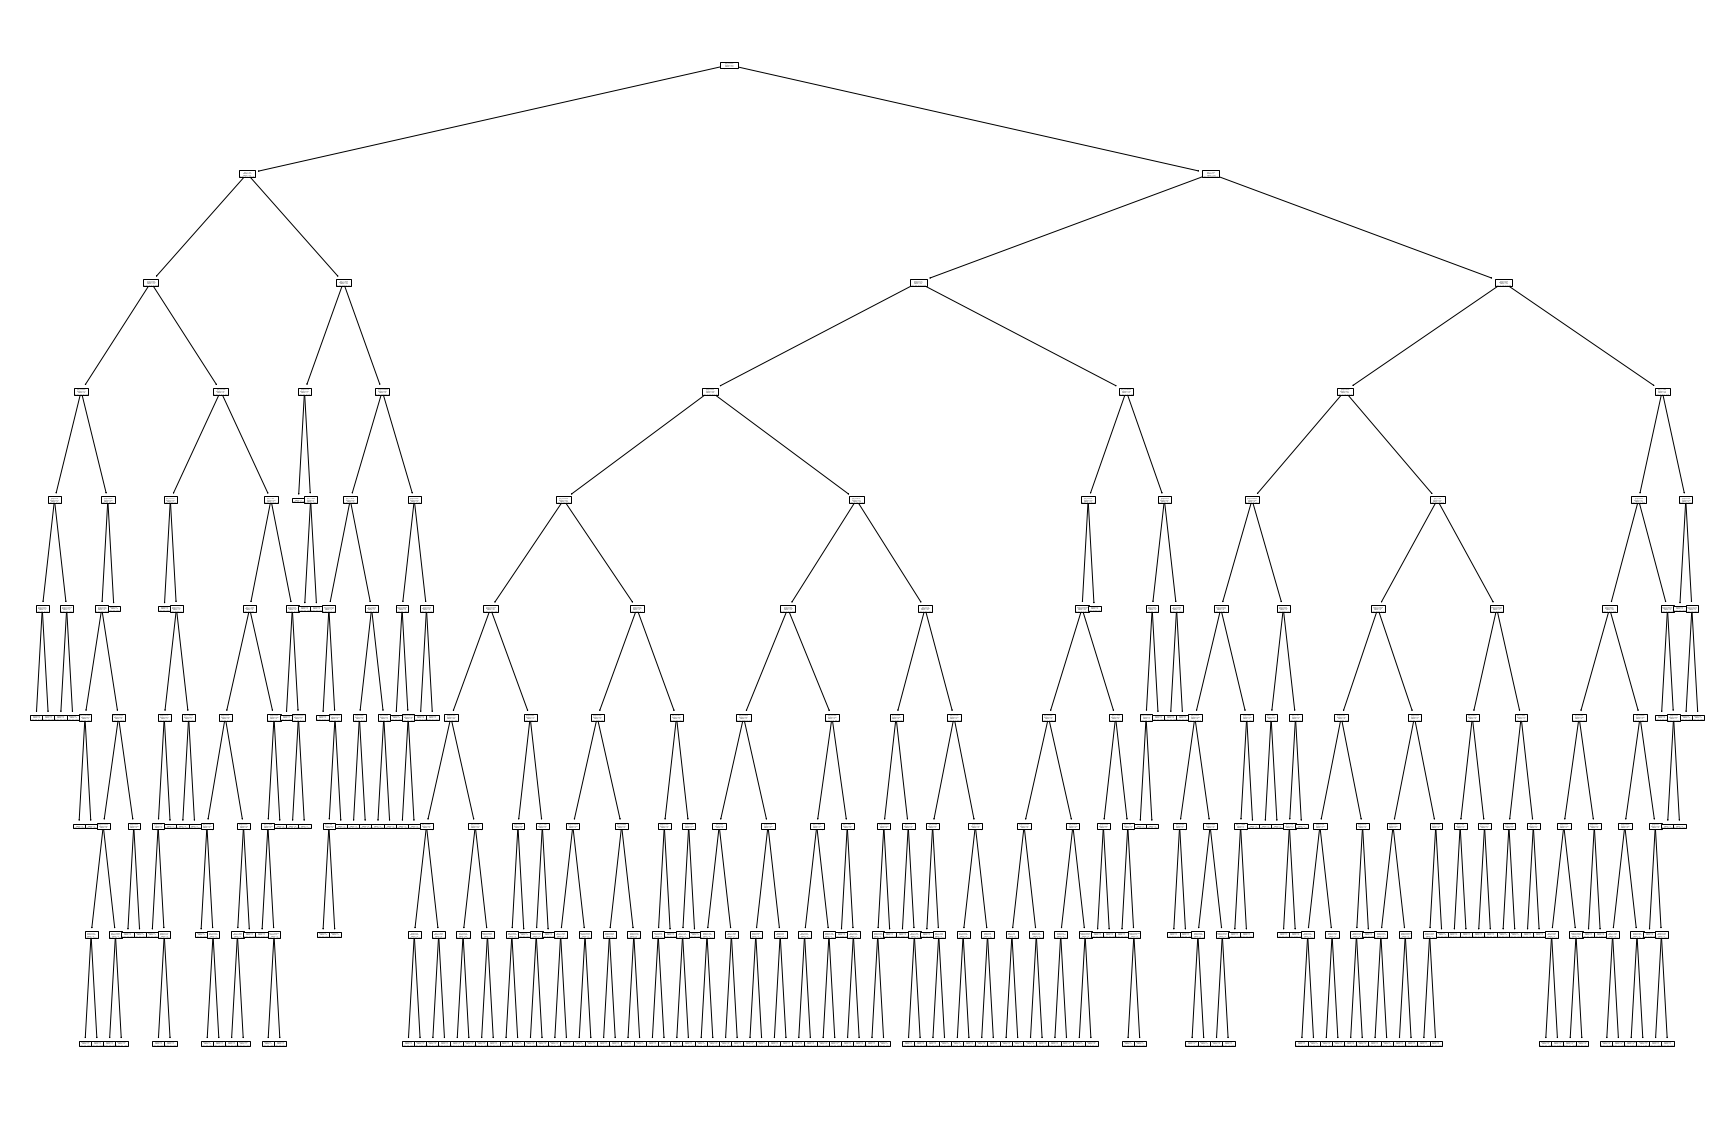

In [105]:
##visulaize decision tree
plt.figure(figsize=(30,20))
tree.plot_tree(clf)
plt.show()


In [106]:
##XGboost
from numpy import loadtxt
from xgboost import XGBClassifier
model2 = XGBClassifier(random_state = 0)
xg = model2.fit(X_train, Y_train)
pred = xg.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
accuracy


C:\Users\Olakeyede Olayinka\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.6994301994301995

In [107]:
recall_score(Y_test, pred, average='macro')

0.5237005931945913

In [108]:
precision_score(Y_test, pred, average='macro')

0.6543714563582113

In [ ]:
##improve accuracy of XG boost by parameter tuning

In [109]:
import xgboost as xgb


from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200]}

model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

model.fit(X_train,Y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   41.0s finished


0.5894938056523422
{'max_depth': 4, 'n_estimators': 100}


In [110]:
model2 = XGBClassifier(max_depth=4,random_state = 0, n_estimators = 100)
xg = model2.fit(X_train, Y_train)
pred = xg.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
accuracy

0.6994301994301995

In [111]:
precision_score(Y_test, pred, average='macro')

0.6970792811362884

In [112]:
recall_score(Y_test, pred, average='macro')

0.5232739247376065

In [118]:
##model stacking

from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.preprocessing import LabelEncoder

label_encoded_y_train = LabelEncoder().fit_transform(Y_train)
label_encoded_y_test = LabelEncoder().fit_transform(Y_test)


knn = KNeighborsClassifier()
svc =SVC()
rf = RandomForestClassifier()
xgb = XGBClassifier()
gb = GradientBoostingClassifier()

stack = StackingCVClassifier(classifiers=(gb, xgb,svc,rf,knn),
                            meta_classifier=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, label_encoded_y_train)
pred = stack.predict(X_test)
accuracy_score(label_encoded_y_test, pred)



0.6994301994301995

In [119]:
precision_score(label_encoded_y_test, pred, average='macro')

0.6607483837533455

In [120]:
recall_score(label_encoded_y_test, pred, average='macro')

0.5272522884399692

In [388]:
##grid search 
from sklearn.model_selection import GridSearchCV


In [418]:
# gradient boosting for classification in scikit-learn


In [121]:
model = GradientBoostingClassifier(random_state=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.660 (0.035)


In [123]:
model = GradientBoostingClassifier(max_depth =3, n_estimators = 300, learning_rate=0.1, random_state=1, )
model.fit(X_train, Y_train)
pred = model.predict(X_test)
accuracy_score(Y_test, pred)

0.6894586894586895

In [125]:
precision_score(Y_test, pred, average='macro')

0.6570936933918955

In [126]:
recall_score(Y_test, pred, average='macro')

0.5061960367971057

In [ ]:
##hyper parameter tuning


In [113]:
from sklearn.preprocessing import LabelEncoder

label_encoded_y_train = LabelEncoder().fit_transform(Y_train)
label_encoded_y_train

array([1, 1, 1, ..., 2, 0, 2])

In [115]:
label_encoded_y_test = LabelEncoder().fit_transform(Y_test)

In [127]:
##random forest(working....)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [128]:
pred2 = rf.predict(X_test)

In [130]:
accuracy_score(Y_test, pred2)

0.6887464387464387

In [131]:
precision_score(Y_test, pred2, average='macro')

C:\Users\Olakeyede Olayinka\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6059912064022452

In [132]:
recall_score(Y_test, pred2, average='macro')

0.4619683409554609

In [135]:

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

##knn needs normalization

In [195]:
##standardize data

In [138]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train3 = scaler.transform(X_train)


In [139]:
scaler = StandardScaler().fit(X_test)
X_test3 = scaler.transform(X_test) 

In [140]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train3, Y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test3)

In [141]:
# Model Accuracy, how often is the classifier correct?
accuracy_score(Y_test, y_pred)

0.6118233618233618

In [142]:
precision_score(Y_test, y_pred, average='macro')

0.5421909608060044

In [143]:
recall_score(Y_test, pred, average='macro')

0.5061960367971057